### import lip

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read data

In [108]:
df=pd.read_csv('/content/ds_salaries.csv')
df.head(3)


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [110]:
# Summary of DataFrame Structure
# The DataFrame contains 607 rows and 12 columns.
# All columns have non-null values. Below is a description of each column:

# Column Descriptions:
# 1. Unnamed: 0          : Index column, integer values (int64).
# 2. work_year           : Year of data entry, integer values (int64).
# 3. experience_level    : Employee experience level, string values (object).
# 4. employment_type     : Employment type, string values (object).
# 5. job_title           : Job title, string values (object).
# 6. salary              : Salary amount, integer values (int64).
# 7. salary_currency     : Salary currency, string values (object).
# 8. salary_in_usd       : Equivalent salary in USD, integer values (int64).
# 9. employee_residence  : Employee's residence location, string values (object).
# 10. remote_ratio       : Percentage of remote work, integer values (int64).
# 11. company_location   : Company's location, string values (object).
# 12. company_size       : Company's size, string values (object).

# Memory Usage:
# The DataFrame takes approximately 57.0 KB of memory.

# Notes:
# - All columns have 607 non-null values, indicating no missing data.
# - Column 'Unnamed: 0' appears to be an index column and may be redundant.
# - Data types are appropriate for the data.
#   - Numeric data (e.g., int64) is used for 'work_year', 'salary', and 'remote_ratio'.
#   - Categorical data (e.g., object) is used for 'experience_level', 'job_title', and 'company_size'.

# Next Steps:
# - Consider dropping the 'Unnamed: 0' column if it's not necessary.
# - Perform further analysis or visualizations as needed.

### check nulls

In [111]:
df.isna().sum()

,0
Unnamed: 0,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0


In [112]:
df.isnull().mean()*100
# (df.isnull().mean()).round(2)

,0
Unnamed: 0,0.0
work_year,0.0
experience_level,0.0
employment_type,0.0
job_title,0.0
salary,0.0
salary_currency,0.0
salary_in_usd,0.0
employee_residence,0.0
remote_ratio,0.0


<Axes: >

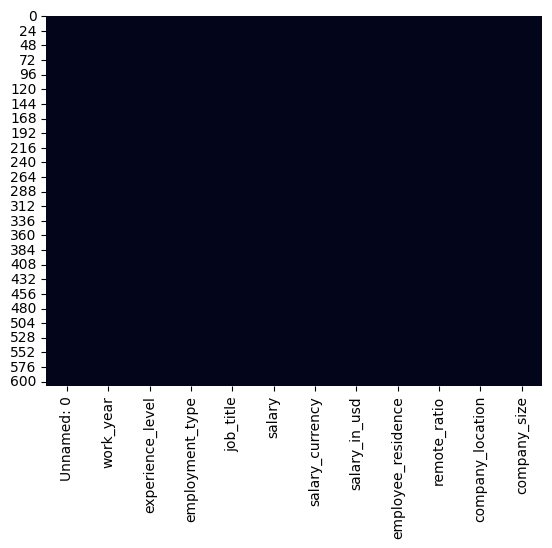

In [113]:
sns.heatmap(df.isnull(),cbar=False)

#### drop nulls

In [114]:
#if found na
#df= df.dropna()
#df.dropna(inplace=True)

### check duplicates

In [115]:
df.duplicated().sum()

0

In [116]:
## if founded
#df.drop_duplicates(inplace=True)

### EDA

In [117]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [118]:
df.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


In [119]:
## The mean and 50% (median) are very similar, which suggests a likely normal distribution.

#### corr

In [120]:
df.corr(numeric_only=True)

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
Unnamed: 0,1.000000,0.886550,-0.096250,0.167025,0.095000
work_year,0.886550,1.000000,-0.087577,0.170493,0.076314
salary,-0.096250,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.167025,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.095000,0.076314,-0.014608,0.132122,1.000000


<Axes: >

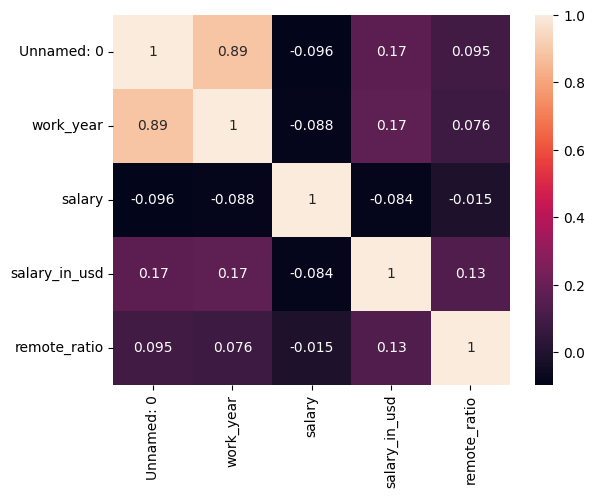

In [121]:
df_numerics=df.select_dtypes(include='number')
sns.heatmap(df_numerics.corr(),annot=True)

#### Univariate Analysis

In [122]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [123]:
df['job_title'].value_counts()

,count
job_title,
Data Scientist,143
Data Engineer,132
Data Analyst,97
Machine Learning Engineer,41
Research Scientist,16
Data Science Manager,12
Data Architect,11
Big Data Engineer,8
Machine Learning Scientist,8


<Axes: xlabel='count', ylabel='job_title'>

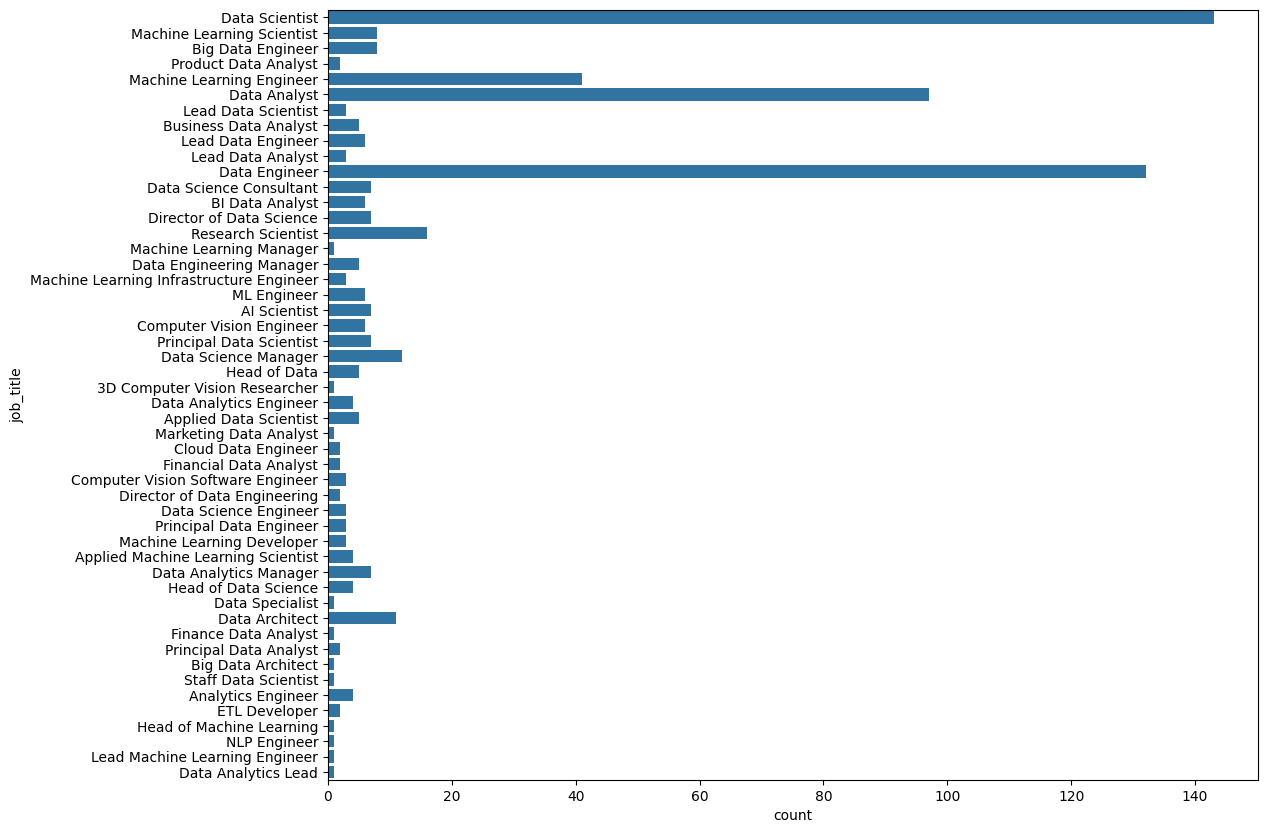

In [124]:
plt.figure(figsize=(12, 10))
sns.countplot(df['job_title'])

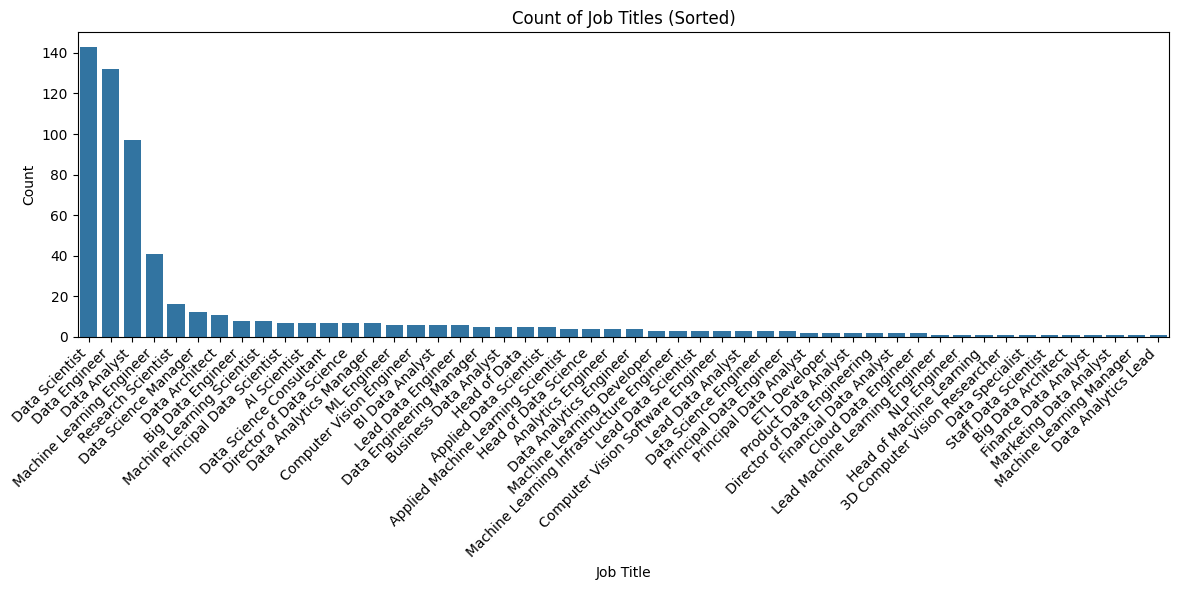

In [125]:
job_order = df['job_title'].value_counts().index

# Importing necessary libraries
plt.figure(figsize=(12, 6))  # Set the figure size to 12x6 for better visualization

# Create a count plot with job titles, sorted by their frequency
# 'order=job_order' ensures that job titles are ordered by their count in descending order
sns.countplot(data=df, x='job_title', order=job_order)

# Rotate the x-axis labels by 45 degrees and align them to the right for better readability
plt.xticks(rotation=45, ha='right')

# Add a title to the plot
plt.title('Count of Job Titles (Sorted)')

# Label the x-axis as "Job Title"
plt.xlabel('Job Title')

# Label the y-axis as "Count"
plt.ylabel('Count')

# Adjust the layout to prevent overlapping of labels and titles
plt.tight_layout()

# Display the final plot
plt.show()


In [143]:
import plotly.express as px

In [132]:
px.histogram(df,x='job_title',color='job_title')

In [133]:
fig = px.histogram(df, y='job_title', color='job_title',
                   category_orders={'job_title': job_order})  # Specify order for 'job_title'
fig.show()

##### reset index with out writing this ## ## job_order = df['job_title'].value_counts().index

In [134]:
reseted_index=df['job_title'].value_counts().reset_index().sort_values(by='count',ascending=False)
reseted_index

,job_title,count
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16
5,Data Science Manager,12
6,Data Architect,11
7,Big Data Engineer,8
8,Machine Learning Scientist,8
13,Data Analytics Manager,7


In [135]:
px.histogram(data_frame=reseted_index,x='job_title',y='count')

#####  

In [155]:
#company_size
df_company_size=df['company_size'].value_counts().reset_index().sort_values(by='count',ascending=False)
df_company_size

,company_size,count
0,M,326
1,L,198
2,S,83


In [162]:
px.histogram(data_frame=df_company_size,x='company_size',y='count',color='company_size')

<Axes: xlabel='company_size', ylabel='count'>

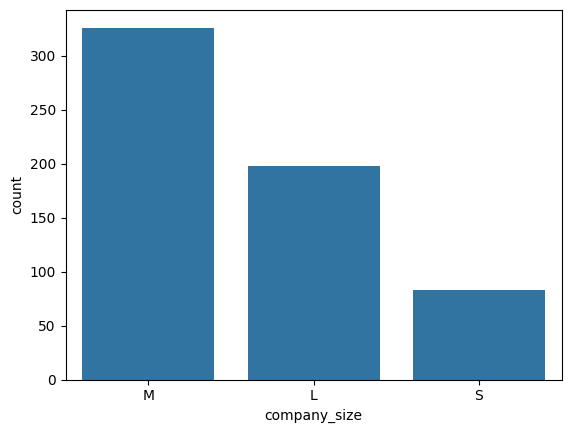

In [160]:
df_company_sizee=df['company_size'].value_counts().index
sns.countplot(data=df, x='company_size',order=df_company_sizee)

In [171]:
px.pie(data_frame=df_company_size,names='company_size',values='count',hole=0.3)

In [176]:
df_work_year=df['work_year'].value_counts().reset_index().sort_values(by='count',ascending=False)
df_work_year

,work_year,count
0,2022,318
1,2021,217
2,2020,72


In [177]:
px.line(data_frame=df_work_year,x='work_year',y='count')

<Axes: xlabel='work_year', ylabel='count'>

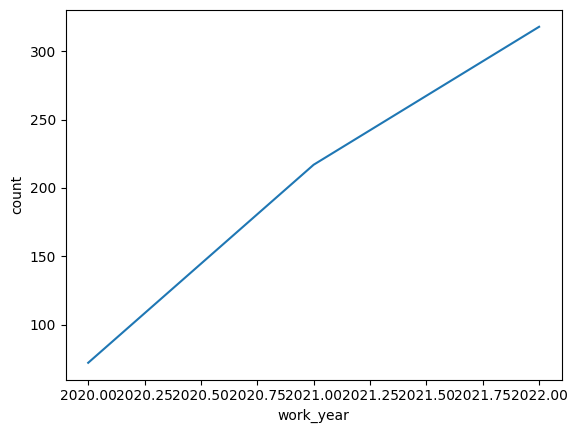

In [178]:
sns.lineplot(data=df_work_year,x='work_year',y='count')

In [182]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

#### biovarate analises



In [183]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [208]:
df_jop_salare=df.groupby('job_title')['salary_in_usd'].mean().round(2).reset_index().sort_values(by='salary_in_usd',ascending=True)
df_jop_salare

,job_title,salary_in_usd
0,3D Computer Vision Researcher,5409.00
47,Product Data Analyst,13036.00
43,NLP Engineer,37236.00
10,Computer Vision Engineer,44419.33
7,Big Data Engineer,51974.00
26,ETL Developer,54957.00
27,Finance Data Analyst,61896.00
13,Data Analytics Engineer,64799.25
1,AI Scientist,66135.57
19,Data Science Consultant,69420.71


In [211]:
px.bar(data_frame=df_jop_salare,y='job_title',x='salary_in_usd',text_auto=True)

#### Multivariate Analysis

In [215]:
pd.pivot_table(df,index='job_title',columns='company_size',values='salary_in_usd',aggfunc='mean').round(2)

company_size,L,M,S
job_title,,,
3D Computer Vision Researcher,NaN,5409.00,NaN
AI Scientist,127500.00,66000.00,25316.33
Analytics Engineer,NaN,175000.00,NaN
Applied Data Scientist,175655.00,NaN,NaN
Applied Machine Learning Scientist,249000.00,35137.50,NaN
BI Data Analyst,93129.50,99000.00,32136.00
Big Data Architect,NaN,99703.00,NaN
Big Data Engineer,28680.25,84512.00,66023.50
Business Data Analyst,91253.50,18442.00,NaN
